## Import Package

In [1]:
import pandas as pd
import requests
import descartes
from shapely.geometry import Point,Polygon
import gspread
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.font_manager
from splot.mapping import vba_choropleth
%matplotlib inline

## Import Covid Cases from API (Titik Kasus)

In [3]:
r = requests.get('https://covid19-public.digitalservice.id/api/v1/sebaran_v2/jabar')
x = r.json()
api = pd.DataFrame(x.get('data').get('content'))

In [4]:
api

,id,kode_kab,nama_kab,kode_kec,nama_kec,kode_kel,nama_kel,status,stage,umur,gender,longitude,latitude,tanggal_update_nasional,tanggal_konfirmasi,tanggal_update
0,covid-1022200028799,3276,Kota Depok,3276041,Tapos,3276041006,Sukamaju Baru,CLOSECONTACT,Dikarantina,5,Perempuan,106.874,-6.406,2020-12-15,2020-12-15,2020-12-15
1,covid-1022200028803,3276,Kota Depok,3276061,Cinere,3276061002,Gandul,CLOSECONTACT,Discarded,26,Perempuan,106.792,-6.339,2020-12-15,2020-12-15,2020-12-15
2,covid-1022200028800,3276,Kota Depok,3276060,Limo,3276060004,Limo,CLOSECONTACT,Dikarantina,23,Perempuan,106.778,-6.360,2020-12-15,2020-12-15,2020-12-15
3,covid-1022200028801,3276,Kota Depok,3276030,Sukmajaya,3276030006,Sukmajaya,CLOSECONTACT,Discarded,52,Perempuan,106.841,-6.414,2020-12-15,2020-12-15,2020-12-15
4,covid-1022200028802,3276,Kota Depok,3276060,Limo,3276060004,Limo,CLOSECONTACT,Dikarantina,33,Perempuan,106.778,-6.360,2020-12-15,2020-12-15,2020-12-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247647,from_manual_68062,3204,Kabupaten Bandung,3204130,ciparay,3204130014,bumiwangi,CONFIRMATION,Diisolasi,19,Perempuan,107.695,-7.040,2020-12-15,2020-11-26,
247648,from_manual_68063,3204,Kabupaten Bandung,3204180,katapang,3204180010,sukamukti,CONFIRMATION,Diisolasi,60,Laki-laki,107.581,-7.001,2020-12-15,2020-11-26,
247649,from_manual_68064,3204,Kabupaten Bandung,3204160,banjaran,3204160007,kiangroke,CONFIRMATION,Diisolasi,40,Laki-laki,107.567,-7.050,2020-12-15,2020-11-19,
247650,from_manual_68065,3204,Kabupaten Bandung,3204080,paseh,3204080003,cipaku,CONFIRMATION,Diisolasi,55,Laki-laki,107.783,-7.059,2020-12-15,2020-11-11,


### Make the lat-long column to geometry

In [5]:
geometry = [Point(xy) for xy in zip(api['longitude'],api['latitude'])]
geometry[:3]

In [6]:
crs={'init':'epsg:4326'}

In [7]:
geo_api = gpd.GeoDataFrame(api,
                          crs=crs,
                          geometry=geometry)

C:\Users\chris\anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [8]:
geo_api.head()

,id,kode_kab,nama_kab,kode_kec,nama_kec,kode_kel,nama_kel,status,stage,umur,gender,longitude,latitude,tanggal_update_nasional,tanggal_konfirmasi,tanggal_update,geometry
0,covid-1022200028799,3276,Kota Depok,3276041,Tapos,3276041006,Sukamaju Baru,CLOSECONTACT,Dikarantina,5,Perempuan,106.874,-6.406,2020-12-15,2020-12-15,2020-12-15,POINT (106.87400 -6.40600)
1,covid-1022200028803,3276,Kota Depok,3276061,Cinere,3276061002,Gandul,CLOSECONTACT,Discarded,26,Perempuan,106.792,-6.339,2020-12-15,2020-12-15,2020-12-15,POINT (106.79200 -6.33900)
2,covid-1022200028800,3276,Kota Depok,3276060,Limo,3276060004,Limo,CLOSECONTACT,Dikarantina,23,Perempuan,106.778,-6.360,2020-12-15,2020-12-15,2020-12-15,POINT (106.77800 -6.36000)
3,covid-1022200028801,3276,Kota Depok,3276030,Sukmajaya,3276030006,Sukmajaya,CLOSECONTACT,Discarded,52,Perempuan,106.841,-6.414,2020-12-15,2020-12-15,2020-12-15,POINT (106.84100 -6.41400)
4,covid-1022200028802,3276,Kota Depok,3276060,Limo,3276060004,Limo,CLOSECONTACT,Dikarantina,33,Perempuan,106.778,-6.360,2020-12-15,2020-12-15,2020-12-15,POINT (106.77800 -6.36000)


In [9]:
geo_api['status'].unique()

array(['CLOSECONTACT', 'SUSPECT', 'PROBABLE', 'CONFIRMATION'],
      dtype=object)

## Import Lat-Long Kecamatan

In [10]:
gc = gspread.oauth()
sh = gc.open('Schema: Redzone Pembukaan Sekolah') #Memanggil Spreadsheet 'Schema Disdik: Pembukaan Sekolah'
df = pd.DataFrame(sh.worksheet('schema').get_all_values()) #memanggil sheet tertentu
df = df.rename(columns = df.iloc[0].drop(df.index[0])) #Mengganti nama kolom sesuai baris pertama
df = df.iloc[1:] #Menghapus baris 1
df.rename(columns={0:'bps_kode'},inplace=True)
df

,bps_kode,nama_desa,nama_kec,nama_kab,transmission_potency,death_potency,transmission_risk,death_risk,tipe_provisioning,coverage,jumlah_positif,jumlah_positif_tetangga,i_sinyal_mayoritas_seluler,i_sinyal_internet_seluler,kemudahan_rs,kemudahan_puskesmas_inap,peta_risiko
1,3201010001,MALASARI,NANGGUNG,KAB. BOGOR,0.32283673,0.53063685,0,0,,,#N/A,,3,3,3,3,2
2,3201010002,BANTARKARET,NANGGUNG,KAB. BOGOR,0.31189743,0.5251056,0,0,,,#N/A,,2,2,2,2,2
3,3201010003,CISARUA,NANGGUNG,KAB. BOGOR,0.32050383,0.52444059,0,0,,,#N/A,,3,2,2,2,2
4,3201010004,CURUGBITUNG,NANGGUNG,KAB. BOGOR,0.24771975,0.52802098,0,0,,,#N/A,,3,2,2,2,2
5,3201010005,NANGGUNG,NANGGUNG,KAB. BOGOR,0.18077457,0.56781411,0,0,,,#N/A,,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5953,3279040002,BOJONGKANTONG,LANGENSARI,KOTA BANJAR,0.29664996,0.56847912,0,0,,,2,1,2,2,1,1,1
5954,3279040003,REJASARI,LANGENSARI,KOTA BANJAR,0.24467306,0.51824439,0,0,,,2,1,2,1,1,1,1
5955,3279040004,LANGENSARI,LANGENSARI,KOTA BANJAR,0.34350741,0.54679239,0.01951388295,0.01960082791,1,1,1,1,3,2,2,0,1
5956,3279040005,MUKTISARI,LANGENSARI,KOTA BANJAR,0.35636637,0.55143952,0,0,,,1,2,2,1,1,1,1


## Import Peta Risiko

In [11]:
gc = gspread.oauth()
sh = gc.open('Tes DA') #Memanggil Spreadsheet 'Schema Disdik: Pembukaan Sekolah'
risk = pd.DataFrame(sh.worksheet('peta risiko').get_all_values()) #memanggil sheet tertentu
risk = risk.rename(columns = risk.iloc[0].drop(risk.index[0])) #Mengganti nama kolom sesuai baris pertama
risk = risk.iloc[1:] #Menghapus baris 1
risk.rename(columns={0:'nama_kab'},inplace=True)
risk

,nama_kab,status
1,KAB. BANDUNG,Sedang
2,KAB. BEKASI,Rendah
3,KAB. BOGOR,Rendah
4,KAB. CIAMIS,Sedang
5,KAB. CIANJUR,Rendah
6,KAB. CIREBON,Sedang
7,KAB. GARUT,Tinggi
8,KAB. INDRAMAYU,Sedang
9,KAB. KARAWANG,Tinggi
10,KAB. BANDUNG BARAT,Sedang


### Merge peta risiko and lat-long kecamatan

In [12]:
peta_risiko = pd.merge(df,risk,
                     on = 'nama_kab',
                     how='left')
peta_risiko

,bps_kode,nama_desa,nama_kec,nama_kab,transmission_potency,death_potency,transmission_risk,death_risk,tipe_provisioning,coverage,jumlah_positif,jumlah_positif_tetangga,i_sinyal_mayoritas_seluler,i_sinyal_internet_seluler,kemudahan_rs,kemudahan_puskesmas_inap,peta_risiko,status
0,3201010001,MALASARI,NANGGUNG,KAB. BOGOR,0.32283673,0.53063685,0,0,,,#N/A,,3,3,3,3,2,Rendah
1,3201010002,BANTARKARET,NANGGUNG,KAB. BOGOR,0.31189743,0.5251056,0,0,,,#N/A,,2,2,2,2,2,Rendah
2,3201010003,CISARUA,NANGGUNG,KAB. BOGOR,0.32050383,0.52444059,0,0,,,#N/A,,3,2,2,2,2,Rendah
3,3201010004,CURUGBITUNG,NANGGUNG,KAB. BOGOR,0.24771975,0.52802098,0,0,,,#N/A,,3,2,2,2,2,Rendah
4,3201010005,NANGGUNG,NANGGUNG,KAB. BOGOR,0.18077457,0.56781411,0,0,,,#N/A,,3,2,2,2,2,Rendah
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5952,3279040002,BOJONGKANTONG,LANGENSARI,KOTA BANJAR,0.29664996,0.56847912,0,0,,,2,1,2,2,1,1,1,Sedang
5953,3279040003,REJASARI,LANGENSARI,KOTA BANJAR,0.24467306,0.51824439,0,0,,,2,1,2,1,1,1,1,Sedang
5954,3279040004,LANGENSARI,LANGENSARI,KOTA BANJAR,0.34350741,0.54679239,0.01951388295,0.01960082791,1,1,1,1,3,2,2,0,1,Sedang
5955,3279040005,MUKTISARI,LANGENSARI,KOTA BANJAR,0.35636637,0.55143952,0,0,,,1,2,2,1,1,1,1,Sedang


## Import Shapefile Kelurahan

In [13]:
file = "kelurahan.shp"
dfg = gpd.read_file(file).dropna(subset = ['geometry']) # open file
dfg

,id,id_kecamat,kemendagri,kemendag_1,bps_kode,bps_nama,geometry
0,27405,10277,32.05.39.2002,PUTRAJAWA,3205300002,PUTRAJAWA,"POLYGON ((107.99641 -6.99107, 107.99720 -6.992..."
1,27808,10360,32.07.17.2007,KERTAJAYA,3207110005,KERTAJAYA,"POLYGON ((108.67336 -7.41340, 108.67350 -7.414..."
2,27409,10277,32.05.39.2005,CIRAPUHAN,3205300005,CIRAPUHAN,"POLYGON ((108.04922 -6.99397, 108.04938 -6.994..."
3,27408,10277,32.05.39.2007,SAMIDA,3205300006,SAMIDA,"POLYGON ((108.03048 -6.99156, 108.03048 -6.991..."
4,28945,10435,32.10.22.2005,BANJARAN,3210041009,BANJARAN,"POLYGON ((108.32169 -6.95904, 108.32217 -6.959..."
...,...,...,...,...,...,...,...
5952,27598,10318,32.06.18.2002,MULYASARI,3206140005,MULYASARI,"POLYGON ((108.33576 -7.52637, 108.33572 -7.526..."
5953,27402,10268,32.05.38.2007,SIMPEN KALER,3205290015,SIMPEN KALER,"POLYGON ((107.93031 -7.01802, 107.93022 -7.018..."
5954,27811,10360,32.07.17.2018,KALAPASAWIT,3207110003,KALAPASAWIT,"POLYGON ((108.63680 -7.38144, 108.63688 -7.381..."
5955,27406,10277,32.05.39.2003,CIGAWIR,3205300001,CIGAWIR,"POLYGON ((108.00889 -7.01934, 108.00889 -7.019..."


### Merge shapefile dengan peta risiko

In [14]:
dfg['bps_kode'] = dfg['bps_kode'].apply(pd.to_numeric)
peta_risiko['bps_kode'] = peta_risiko['bps_kode'].apply(pd.to_numeric)
risk_map = pd.merge(dfg,peta_risiko,
                     on = 'bps_kode',
                     how='left')

### Pengelompokan risiko

In [15]:
rendah = risk_map[risk_map['status']=='Rendah']
sedang = risk_map[risk_map['status']=='Sedang']
tinggi = risk_map[risk_map['status']=='Tinggi']

## Map Peta Risiko

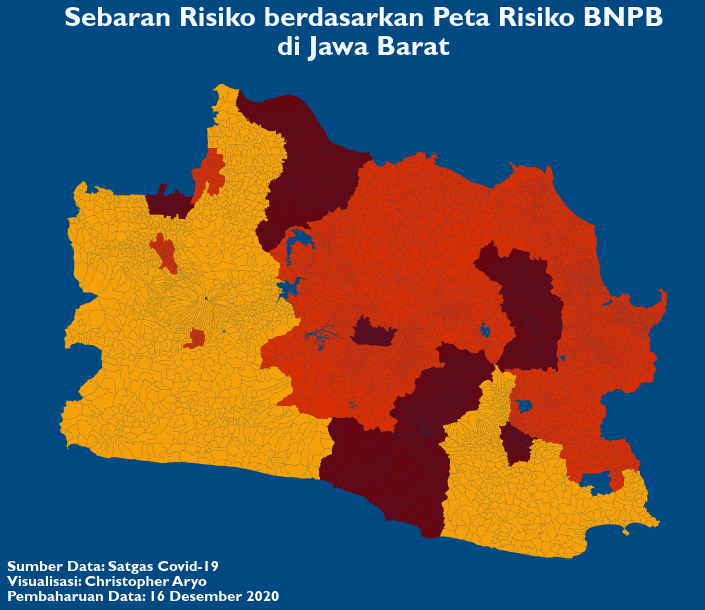

In [40]:
fig, ax = plt.subplots(figsize=(12,12))
ax.set_aspect('equal')
background = "#004a84"
fig.set_facecolor(background)

ax.set_title('Sebaran Risiko berdasarkan Peta Risiko BNPB\ndi Jawa Barat',loc='center',fontsize=28, fontweight ='bold',color='#F4FAFF',fontfamily='Gill Sans MT')
ax.axis('off')
#color = [['red','orange','green']]

rendah.plot(ax=ax,alpha=5,color='#faa307',label='1')
tinggi.plot(ax=ax,alpha=5,color='#6a040f',label='2')
sedang.plot(ax=ax,alpha=5,color='#dc2f02',label='0')

fig.text(0.1, 0.18, "Sumber Data: Satgas Covid-19 \nVisualisasi: Christopher Aryo \nPembaharuan Data: 16 Desember 2020",
         fontsize=15, ha='left',color='white',fontfamily='Gill Sans MT',fontweight='bold')


#plt.savefig('sebaran.png')
plt.show()

Peta di atas menunjukan sebaran peta risiko di Jawa Barat

In [87]:
confi = geo_api[geo_api['status']=='CONFIRMATION']

In [90]:
geo_api['status'].unique()

array(['CLOSECONTACT', 'SUSPECT', 'PROBABLE', 'CONFIRMATION'],
      dtype=object)

## Overlay dengan Kasus

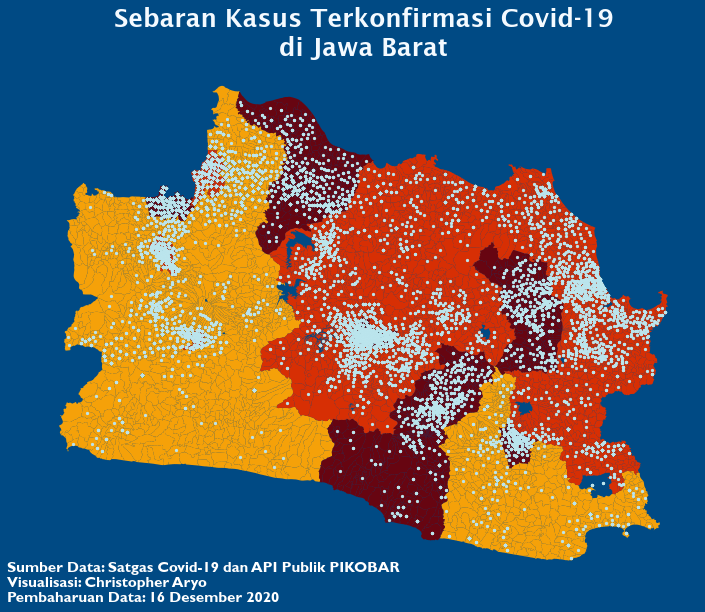

In [92]:
fig, ax = plt.subplots(figsize=(12,12))
ax.set_aspect('equal')
background = "#004a84"
fig.set_facecolor(background)

ax.set_title('Sebaran Kasus Terkonfirmasi Covid-19\ndi Jawa Barat',loc='center',fontsize=25,color='#F4FAFF',fontfamily='Lucida Sans',fontweight='bold')
ax.axis('off')

rendah.plot(ax=ax,alpha=5,color='#faa307',label='1')
tinggi.plot(ax=ax,alpha=5,color='#6a040f',label='2')
sedang.plot(ax=ax,alpha=5,color='#dc2f02',label='0')

geo_api[geo_api['status']=='CONFIRMATION'].plot(ax=ax,markersize=5,color='#BBE5ED',marker='o',label='Kasus Terkonfirmasi')


fig.text(0.1, 0.18, "Sumber Data: Satgas Covid-19 dan API Publik PIKOBAR\nVisualisasi: Christopher Aryo \nPembaharuan Data: 16 Desember 2020",
         fontsize=15, ha='left',color='white',fontfamily='Gill Sans MT',fontweight='bold')

#plt.legend()
#plt.savefig('sebaran.png')
plt.show()

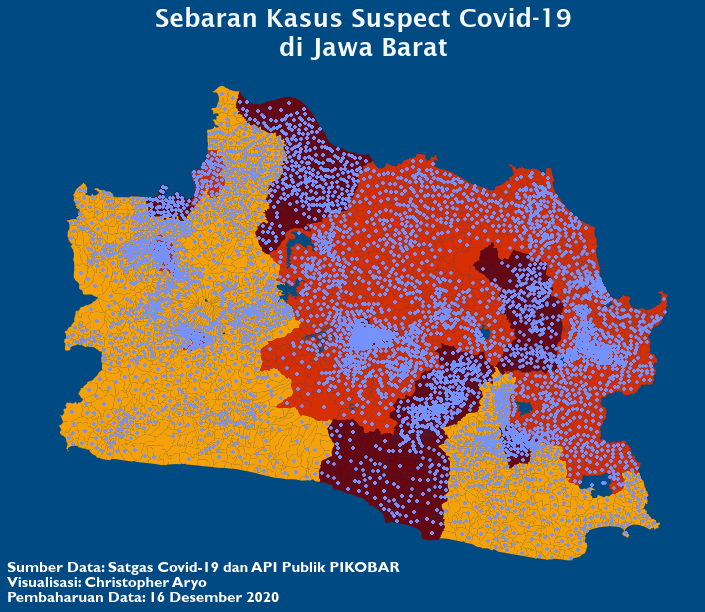

In [96]:
fig, ax = plt.subplots(figsize=(12,12))
ax.set_aspect('equal')
background = "#004a84"
fig.set_facecolor(background)

ax.set_title('Sebaran Kasus Suspect Covid-19\ndi Jawa Barat',loc='center',fontsize=25,color='#F4FAFF',fontfamily='Lucida Sans',fontweight='bold')
ax.axis('off')

rendah.plot(ax=ax,alpha=5,color='#faa307',label='1')
tinggi.plot(ax=ax,alpha=5,color='#6a040f',label='2')
sedang.plot(ax=ax,alpha=5,color='#dc2f02',label='0')

geo_api[geo_api['status']=='SUSPECT'].plot(ax=ax,markersize=10,color='#7692FF',marker='+',label='Kasus Terkonfirmasi')


fig.text(0.1, 0.18, "Sumber Data: Satgas Covid-19 dan API Publik PIKOBAR\nVisualisasi: Christopher Aryo \nPembaharuan Data: 16 Desember 2020",
         fontsize=15, ha='left',color='white',fontfamily='Gill Sans MT',fontweight='bold')

#plt.legend()
#plt.savefig('sebaran.png')
plt.show()

In [100]:
con = geo_api[geo_api['status']=='CONFIRMATION'].count()
con

id                         68066
kode_kab                   68066
nama_kab                   68066
kode_kec                   68066
nama_kec                   68066
kode_kel                   68066
nama_kel                   68066
status                     68066
stage                      68066
umur                       68066
gender                     68066
longitude                  65778
latitude                   65778
tanggal_update_nasional    68066
tanggal_konfirmasi         68066
tanggal_update             68066
geometry                   68066
dtype: int64

In [97]:
sus = geo_api[geo_api['status']=='SUSPECT'].count()

In [98]:
sus

id                         85181
kode_kab                   85181
nama_kab                   85181
kode_kec                   85181
nama_kec                   85181
kode_kel                   85181
nama_kel                   85181
status                     85181
stage                      85181
umur                       85181
gender                     85181
longitude                  85181
latitude                   85181
tanggal_update_nasional    85181
tanggal_konfirmasi         85181
tanggal_update             85181
geometry                   85181
dtype: int64

In [22]:
import matplotlib.font_manager
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

['C:\\Windows\\Fonts\\upclbi.ttf',
 'C:\\Windows\\Fonts\\VIVALDII.TTF',
 'C:\\Windows\\Fonts\\gautami.ttf',
 'C:\\Windows\\Fonts\\corbel.ttf',
 'C:\\Windows\\Fonts\\seguili.ttf',
 'C:\\Windows\\Fonts\\FRAMDCN.TTF',
 'C:\\Windows\\Fonts\\MATURASC.TTF',
 'C:\\Windows\\Fonts\\kokilabi.ttf',
 'C:\\Windows\\Fonts\\NIAGENG.TTF',
 'C:\\Windows\\Fonts\\ELEPHNTI.TTF',
 'C:\\Windows\\Fonts\\cordia.ttc',
 'C:\\Windows\\Fonts\\ITCEDSCR.TTF',
 'C:\\Windows\\Fonts\\iskpota.ttf',
 'C:\\Windows\\Fonts\\arialbi.ttf',
 'C:\\Windows\\Fonts\\seguibli.ttf',
 'C:\\Windows\\Fonts\\cambriai.ttf',
 'C:\\Windows\\Fonts\\webdings.ttf',
 'C:\\Windows\\Fonts\\LeelaUIb.ttf',
 'C:\\Windows\\Fonts\\LBRITEI.TTF',
 'C:\\Users\\chris\\AppData\\Local\\Microsoft\\Windows\\Fonts\\Roboto-CondensedItalic.ttf',
 'C:\\Windows\\Fonts\\segoeuiz.ttf',
 'C:\\Windows\\Fonts\\PLAYBILL.TTF',
 'C:\\Windows\\Fonts\\SCHLBKI.TTF',
 'C:\\Windows\\Fonts\\PRISTINA.TTF',
 'C:\\Windows\\Fonts\\GeorgiaPro-CondSemiBoldItalic.ttf',
 'C:\\Windows

In [26]:
matplotlib.font_manager.fontManager.ttflist

[<Font 'DejaVu Serif' (DejaVuSerif-BoldItalic.ttf) italic normal 700 normal>,
 <Font 'DejaVu Sans' (DejaVuSans-Bold.ttf) normal normal 700 normal>,
 <Font 'STIXNonUnicode' (STIXNonUniBolIta.ttf) italic normal 700 normal>,
 <Font 'STIXSizeFourSym' (STIXSizFourSymBol.ttf) normal normal 700 normal>,
 <Font 'STIXSizeTwoSym' (STIXSizTwoSymReg.ttf) normal normal regular normal>,
 <Font 'STIXNonUnicode' (STIXNonUniIta.ttf) italic normal 400 normal>,
 <Font 'DejaVu Sans Mono' (DejaVuSansMono.ttf) normal normal 400 normal>,
 <Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal regular normal>,
 <Font 'cmr10' (cmr10.ttf) normal normal 400 normal>,
 <Font 'DejaVu Sans Mono' (DejaVuSansMono-Bold.ttf) normal normal 700 normal>,
 <Font 'DejaVu Sans Mono' (DejaVuSansMono-Oblique.ttf) oblique normal 400 normal>,
 <Font 'DejaVu Sans Mono' (DejaVuSansMono-BoldOblique.ttf) oblique normal 700 normal>,
 <Font 'DejaVu Serif' (DejaVuSerif-Bold.ttf) normal normal 700 normal>,
 <Font 'STIXSizeThreeSym

In [25]:
import matplotlib.font_manager
from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

HTML("<div style='column-count: 2;'>{}</div>".format(code))

In [5]:
api['status'].unique()

array(['CLOSECONTACT', 'SUSPECT', 'PROBABLE', 'CONFIRMATION'],
      dtype=object)

In [6]:
api['stage'].unique()

array(['Dikarantina', 'Discarded', 'Diisolasi', 'Selesai', 'Meninggal'],
      dtype=object)

In [7]:
api['nama_kab'].unique()

array(['KOTA BEKASI', 'KAB. SUKABUMI', 'KOTA SUKABUMI', 'KAB. CIANJUR',
       'Kota Depok', 'KAB. KUNINGAN', 'KOTA CIMAHI', 'KAB. TASIKMALAYA',
       'KOTA TASIKMALAYA', 'KOTA BANDUNG', 'KAB. MAJALENGKA',
       'KAB. BANDUNG', 'KAB. CIAMIS', 'KAB. GARUT', 'KAB. PANGANDARAN',
       'KAB. BOGOR', 'KAB. BANDUNG BARAT', 'KAB. PURWAKARTA',
       'KAB. SUMEDANG', 'KOTA DEPOK', 'KAB. KARAWANG', 'KOTA BANJAR',
       'KAB. CIREBON', 'KAB. SUBANG', 'CITEUREUP KOTA CIMAHI',
       'KOTA BOGOR', 'KAB. BEKASI', 'KAB. INDRAMAYU', 'KOTA CIREBON',
       'Kota Bogor', 'Kabupaten Cirebon', 'Kabupaten Pangandaran',
       'Kabupaten Bandung', 'Kabupaten Ciamis', 'Kabupaten Subang',
       'Kota Tasikmalaya', 'Kota Banjar', 'Kabupaten Tasikmalaya',
       'Kabupaten Sumedang', 'Kabupaten Bogor', 'Kabupaten Bekasi',
       'Kabupaten Bandung Barat', 'Kabupaten Purwakarta', 'Kota Bekasi',
       'Kota Cimahi', 'Kabupaten Garut', 'Kabupaten Karawang',
       'Kota Bandung', 'Kabupaten Kuningan', 'Kabu

In [2]:

gc = gspread.oauth()
sh = gc.open('Schema: Redzone Pembukaan Sekolah') #Memanggil Spreadsheet 'Schema Disdik: Pembukaan Sekolah'
df = pd.DataFrame(sh.worksheet('schema').get_all_values()) #memanggil sheet tertentu
df = df.rename(columns = df.iloc[0].drop(df.index[0])) #Mengganti nama kolom sesuai baris pertama
df = df.iloc[1:] #Menghapus baris 1
df.rename(columns={0:'bps_kode'},inplace=True)
df

,bps_kode,nama_desa,nama_kec,nama_kab,transmission_potency,death_potency,transmission_risk,death_risk,tipe_provisioning,coverage,jumlah_positif,jumlah_positif_tetangga,i_sinyal_mayoritas_seluler,i_sinyal_internet_seluler,kemudahan_rs,kemudahan_puskesmas_inap,peta_risiko
1,3201010001,MALASARI,NANGGUNG,KAB. BOGOR,0.32283673,0.53063685,0,0,,,#N/A,,3,3,3,3,2
2,3201010002,BANTARKARET,NANGGUNG,KAB. BOGOR,0.31189743,0.5251056,0,0,,,#N/A,,2,2,2,2,2
3,3201010003,CISARUA,NANGGUNG,KAB. BOGOR,0.32050383,0.52444059,0,0,,,#N/A,,3,2,2,2,2
4,3201010004,CURUGBITUNG,NANGGUNG,KAB. BOGOR,0.24771975,0.52802098,0,0,,,#N/A,,3,2,2,2,2
5,3201010005,NANGGUNG,NANGGUNG,KAB. BOGOR,0.18077457,0.56781411,0,0,,,#N/A,,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5953,3279040002,BOJONGKANTONG,LANGENSARI,KOTA BANJAR,0.29664996,0.56847912,0,0,,,2,1,2,2,1,1,1
5954,3279040003,REJASARI,LANGENSARI,KOTA BANJAR,0.24467306,0.51824439,0,0,,,2,1,2,1,1,1,1
5955,3279040004,LANGENSARI,LANGENSARI,KOTA BANJAR,0.34350741,0.54679239,0.01951388295,0.01960082791,1,1,1,1,3,2,2,0,1
5956,3279040005,MUKTISARI,LANGENSARI,KOTA BANJAR,0.35636637,0.55143952,0,0,,,1,2,2,1,1,1,1


In [3]:
gc = gspread.oauth()
sh = gc.open('Tes DA') #Memanggil Spreadsheet 'Schema Disdik: Pembukaan Sekolah'
risk = pd.DataFrame(sh.worksheet('peta risiko').get_all_values()) #memanggil sheet tertentu
risk = risk.rename(columns = risk.iloc[0].drop(risk.index[0])) #Mengganti nama kolom sesuai baris pertama
risk = risk.iloc[1:] #Menghapus baris 1
risk.rename(columns={0:'nama_kab'},inplace=True)
risk

,nama_kab,status
1,KAB. BANDUNG,Sedang
2,KAB. BEKASI,Rendah
3,KAB. BOGOR,Rendah
4,KAB. CIAMIS,Sedang
5,KAB. CIANJUR,Rendah
6,KAB. CIREBON,Sedang
7,KAB. GARUT,Tinggi
8,KAB. INDRAMAYU,Sedang
9,KAB. KARAWANG,Tinggi
10,KAB. BANDUNG BARAT,Sedang


In [4]:
peta_risiko = pd.merge(df,risk,
                     on = 'nama_kab',
                     how='left')
peta_risiko

,bps_kode,nama_desa,nama_kec,nama_kab,transmission_potency,death_potency,transmission_risk,death_risk,tipe_provisioning,coverage,jumlah_positif,jumlah_positif_tetangga,i_sinyal_mayoritas_seluler,i_sinyal_internet_seluler,kemudahan_rs,kemudahan_puskesmas_inap,peta_risiko,status
0,3201010001,MALASARI,NANGGUNG,KAB. BOGOR,0.32283673,0.53063685,0,0,,,#N/A,,3,3,3,3,2,Rendah
1,3201010002,BANTARKARET,NANGGUNG,KAB. BOGOR,0.31189743,0.5251056,0,0,,,#N/A,,2,2,2,2,2,Rendah
2,3201010003,CISARUA,NANGGUNG,KAB. BOGOR,0.32050383,0.52444059,0,0,,,#N/A,,3,2,2,2,2,Rendah
3,3201010004,CURUGBITUNG,NANGGUNG,KAB. BOGOR,0.24771975,0.52802098,0,0,,,#N/A,,3,2,2,2,2,Rendah
4,3201010005,NANGGUNG,NANGGUNG,KAB. BOGOR,0.18077457,0.56781411,0,0,,,#N/A,,3,2,2,2,2,Rendah
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5952,3279040002,BOJONGKANTONG,LANGENSARI,KOTA BANJAR,0.29664996,0.56847912,0,0,,,2,1,2,2,1,1,1,Sedang
5953,3279040003,REJASARI,LANGENSARI,KOTA BANJAR,0.24467306,0.51824439,0,0,,,2,1,2,1,1,1,1,Sedang
5954,3279040004,LANGENSARI,LANGENSARI,KOTA BANJAR,0.34350741,0.54679239,0.01951388295,0.01960082791,1,1,1,1,3,2,2,0,1,Sedang
5955,3279040005,MUKTISARI,LANGENSARI,KOTA BANJAR,0.35636637,0.55143952,0,0,,,1,2,2,1,1,1,1,Sedang


In [6]:
file = "kelurahan.shp"
dfg = gpd.read_file(file).dropna(subset = ['geometry']) # open file
dfg

,id,id_kecamat,kemendagri,kemendag_1,bps_kode,bps_nama,geometry
0,27405,10277,32.05.39.2002,PUTRAJAWA,3205300002,PUTRAJAWA,"POLYGON ((107.99641 -6.99107, 107.99720 -6.992..."
1,27808,10360,32.07.17.2007,KERTAJAYA,3207110005,KERTAJAYA,"POLYGON ((108.67336 -7.41340, 108.67350 -7.414..."
2,27409,10277,32.05.39.2005,CIRAPUHAN,3205300005,CIRAPUHAN,"POLYGON ((108.04922 -6.99397, 108.04938 -6.994..."
3,27408,10277,32.05.39.2007,SAMIDA,3205300006,SAMIDA,"POLYGON ((108.03048 -6.99156, 108.03048 -6.991..."
4,28945,10435,32.10.22.2005,BANJARAN,3210041009,BANJARAN,"POLYGON ((108.32169 -6.95904, 108.32217 -6.959..."
...,...,...,...,...,...,...,...
5952,27598,10318,32.06.18.2002,MULYASARI,3206140005,MULYASARI,"POLYGON ((108.33576 -7.52637, 108.33572 -7.526..."
5953,27402,10268,32.05.38.2007,SIMPEN KALER,3205290015,SIMPEN KALER,"POLYGON ((107.93031 -7.01802, 107.93022 -7.018..."
5954,27811,10360,32.07.17.2018,KALAPASAWIT,3207110003,KALAPASAWIT,"POLYGON ((108.63680 -7.38144, 108.63688 -7.381..."
5955,27406,10277,32.05.39.2003,CIGAWIR,3205300001,CIGAWIR,"POLYGON ((108.00889 -7.01934, 108.00889 -7.019..."


In [7]:
dfg['bps_kode'] = dfg['bps_kode'].apply(pd.to_numeric)

In [8]:
peta_risiko['bps_kode'] = peta_risiko['bps_kode'].apply(pd.to_numeric)

In [9]:
risk_map = pd.merge(dfg,peta_risiko,
                     on = 'bps_kode',
                     how='left')

In [10]:
risk_map

,id,id_kecamat,kemendagri,kemendag_1,bps_kode,bps_nama,geometry,nama_desa,nama_kec,nama_kab,...,tipe_provisioning,coverage,jumlah_positif,jumlah_positif_tetangga,i_sinyal_mayoritas_seluler,i_sinyal_internet_seluler,kemudahan_rs,kemudahan_puskesmas_inap,peta_risiko,status
0,27405,10277,32.05.39.2002,PUTRAJAWA,3205300002,PUTRAJAWA,"POLYGON ((107.99641 -6.99107, 107.99720 -6.992...",PUTRAJAWA,SELAAWI,KAB. GARUT,...,2,4,1,,3,2,2,2,1,Tinggi
1,27808,10360,32.07.17.2007,KERTAJAYA,3207110005,KERTAJAYA,"POLYGON ((108.67336 -7.41340, 108.67350 -7.414...",KERTAJAYA,LAKBOK,KAB. CIAMIS,...,,,1,,2,1,2,2,1,Sedang
2,27409,10277,32.05.39.2005,CIRAPUHAN,3205300005,CIRAPUHAN,"POLYGON ((108.04922 -6.99397, 108.04938 -6.994...",CIRAPUHAN,SELAAWI,KAB. GARUT,...,,,1,9,3,2,2,2,1,Tinggi
3,27408,10277,32.05.39.2007,SAMIDA,3205300006,SAMIDA,"POLYGON ((108.03048 -6.99156, 108.03048 -6.991...",SAMIDA,SELAAWI,KAB. GARUT,...,,,8,1,3,2,2,2,1,Tinggi
4,28945,10435,32.10.22.2005,BANJARAN,3210041009,BANJARAN,"POLYGON ((108.32169 -6.95904, 108.32217 -6.959...",BANJARAN,BANJARAN,KAB. MAJALENGKA,...,,,1,,2,2,2,2,2,Tinggi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5941,27598,10318,32.06.18.2002,MULYASARI,3206140005,MULYASARI,"POLYGON ((108.33576 -7.52637, 108.33572 -7.526...",MULYASARI,SALOPA,KAB. TASIKMALAYA,...,3,3,1,,2,1,3,2,1,Rendah
5942,27402,10268,32.05.38.2007,SIMPEN KALER,3205290015,SIMPEN KALER,"POLYGON ((107.93031 -7.01802, 107.93022 -7.018...",SIMPEN KALER,BL. LIMBANGAN,KAB. GARUT,...,,,1,,3,1,2,2,1,Tinggi
5943,27811,10360,32.07.17.2018,KALAPASAWIT,3207110003,KALAPASAWIT,"POLYGON ((108.63680 -7.38144, 108.63688 -7.381...",KALAPASAWIT,LAKBOK,KAB. CIAMIS,...,,,1,2,2,2,2,0,1,Sedang
5944,27406,10277,32.05.39.2003,CIGAWIR,3205300001,CIGAWIR,"POLYGON ((108.00889 -7.01934, 108.00889 -7.019...",CIGAWIR,SELAAWI,KAB. GARUT,...,,,1,,2,1,2,0,1,Tinggi


## Bivariate Map

In [43]:
geo_api_pos = geo_api[geo_api['status']=='CONFIRMATION']

In [47]:
geo_api_pos.loc[(geo_api_pos['status'] == 'CONFIRMATION') , 'status'] = 1

C:\Users\chris\anaconda3\lib\site-packages\geopandas\geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [52]:
sum_case = geo_api_pos.groupby(['kode_kel'])['status'].agg('sum').to_frame().reset_index()
sum_case.rename(columns={'kode_kel':'bps_kode'},inplace=True)
sum_case

,bps_kode,status
0,0000000000,2288
1,3201,3399
2,3201010008,1
3,3201020005,2
4,3201020019,1
...,...,...
3565,3279040002,6
3566,3279040003,5
3567,3279040004,5
3568,3279040005,11


In [56]:
risk_map['bps_kode'] = risk_map['bps_kode'].apply(pd.to_numeric)

In [61]:
sum_case['bps_kode'] = sum_case['bps_kode'].apply(pd.to_numeric)

In [62]:
biv_map = pd.merge(risk_map,sum_case,
                 on='bps_kode',
                 how='left')
biv_map

,id,id_kecamat,kemendagri,kemendag_1,bps_kode,bps_nama,geometry,nama_desa,nama_kec,nama_kab,...,coverage,jumlah_positif,jumlah_positif_tetangga,i_sinyal_mayoritas_seluler,i_sinyal_internet_seluler,kemudahan_rs,kemudahan_puskesmas_inap,peta_risiko,status_x,status_y
0,27405,10277,32.05.39.2002,PUTRAJAWA,3205300002,PUTRAJAWA,"POLYGON ((107.99641 -6.99107, 107.99720 -6.992...",PUTRAJAWA,SELAAWI,KAB. GARUT,...,4,1,,3,2,2,2,1,Tinggi,4.0
1,27808,10360,32.07.17.2007,KERTAJAYA,3207110005,KERTAJAYA,"POLYGON ((108.67336 -7.41340, 108.67350 -7.414...",KERTAJAYA,LAKBOK,KAB. CIAMIS,...,,1,,2,1,2,2,1,Sedang,NaN
2,27409,10277,32.05.39.2005,CIRAPUHAN,3205300005,CIRAPUHAN,"POLYGON ((108.04922 -6.99397, 108.04938 -6.994...",CIRAPUHAN,SELAAWI,KAB. GARUT,...,,1,9,3,2,2,2,1,Tinggi,3.0
3,27408,10277,32.05.39.2007,SAMIDA,3205300006,SAMIDA,"POLYGON ((108.03048 -6.99156, 108.03048 -6.991...",SAMIDA,SELAAWI,KAB. GARUT,...,,8,1,3,2,2,2,1,Tinggi,8.0
4,28945,10435,32.10.22.2005,BANJARAN,3210041009,BANJARAN,"POLYGON ((108.32169 -6.95904, 108.32217 -6.959...",BANJARAN,BANJARAN,KAB. MAJALENGKA,...,,1,,2,2,2,2,2,Tinggi,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5941,27598,10318,32.06.18.2002,MULYASARI,3206140005,MULYASARI,"POLYGON ((108.33576 -7.52637, 108.33572 -7.526...",MULYASARI,SALOPA,KAB. TASIKMALAYA,...,3,1,,2,1,3,2,1,Rendah,1.0
5942,27402,10268,32.05.38.2007,SIMPEN KALER,3205290015,SIMPEN KALER,"POLYGON ((107.93031 -7.01802, 107.93022 -7.018...",SIMPEN KALER,BL. LIMBANGAN,KAB. GARUT,...,,1,,3,1,2,2,1,Tinggi,NaN
5943,27811,10360,32.07.17.2018,KALAPASAWIT,3207110003,KALAPASAWIT,"POLYGON ((108.63680 -7.38144, 108.63688 -7.381...",KALAPASAWIT,LAKBOK,KAB. CIAMIS,...,,1,2,2,2,2,0,1,Sedang,NaN
5944,27406,10277,32.05.39.2003,CIGAWIR,3205300001,CIGAWIR,"POLYGON ((108.00889 -7.01934, 108.00889 -7.019...",CIGAWIR,SELAAWI,KAB. GARUT,...,,1,,2,1,2,0,1,Tinggi,2.0


In [63]:
biv_map.rename(columns={'status_y':'confirmation_case'},inplace=True)

In [65]:
biv_map['confirmation_case'] = biv_map['confirmation_case'].fillna(0)

In [66]:
biv_map

,id,id_kecamat,kemendagri,kemendag_1,bps_kode,bps_nama,geometry,nama_desa,nama_kec,nama_kab,...,coverage,jumlah_positif,jumlah_positif_tetangga,i_sinyal_mayoritas_seluler,i_sinyal_internet_seluler,kemudahan_rs,kemudahan_puskesmas_inap,peta_risiko,status_x,confirmation_case
0,27405,10277,32.05.39.2002,PUTRAJAWA,3205300002,PUTRAJAWA,"POLYGON ((107.99641 -6.99107, 107.99720 -6.992...",PUTRAJAWA,SELAAWI,KAB. GARUT,...,4,1,,3,2,2,2,1,Tinggi,4.0
1,27808,10360,32.07.17.2007,KERTAJAYA,3207110005,KERTAJAYA,"POLYGON ((108.67336 -7.41340, 108.67350 -7.414...",KERTAJAYA,LAKBOK,KAB. CIAMIS,...,,1,,2,1,2,2,1,Sedang,0.0
2,27409,10277,32.05.39.2005,CIRAPUHAN,3205300005,CIRAPUHAN,"POLYGON ((108.04922 -6.99397, 108.04938 -6.994...",CIRAPUHAN,SELAAWI,KAB. GARUT,...,,1,9,3,2,2,2,1,Tinggi,3.0
3,27408,10277,32.05.39.2007,SAMIDA,3205300006,SAMIDA,"POLYGON ((108.03048 -6.99156, 108.03048 -6.991...",SAMIDA,SELAAWI,KAB. GARUT,...,,8,1,3,2,2,2,1,Tinggi,8.0
4,28945,10435,32.10.22.2005,BANJARAN,3210041009,BANJARAN,"POLYGON ((108.32169 -6.95904, 108.32217 -6.959...",BANJARAN,BANJARAN,KAB. MAJALENGKA,...,,1,,2,2,2,2,2,Tinggi,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5941,27598,10318,32.06.18.2002,MULYASARI,3206140005,MULYASARI,"POLYGON ((108.33576 -7.52637, 108.33572 -7.526...",MULYASARI,SALOPA,KAB. TASIKMALAYA,...,3,1,,2,1,3,2,1,Rendah,1.0
5942,27402,10268,32.05.38.2007,SIMPEN KALER,3205290015,SIMPEN KALER,"POLYGON ((107.93031 -7.01802, 107.93022 -7.018...",SIMPEN KALER,BL. LIMBANGAN,KAB. GARUT,...,,1,,3,1,2,2,1,Tinggi,0.0
5943,27811,10360,32.07.17.2018,KALAPASAWIT,3207110003,KALAPASAWIT,"POLYGON ((108.63680 -7.38144, 108.63688 -7.381...",KALAPASAWIT,LAKBOK,KAB. CIAMIS,...,,1,2,2,2,2,0,1,Sedang,0.0
5944,27406,10277,32.05.39.2003,CIGAWIR,3205300001,CIGAWIR,"POLYGON ((108.00889 -7.01934, 108.00889 -7.019...",CIGAWIR,SELAAWI,KAB. GARUT,...,,1,,2,1,2,0,1,Tinggi,2.0


In [67]:
biv_map.loc[(biv_map['status_x'] == 'Rendah') , 'status_x'] = 1
biv_map.loc[(biv_map['status_x'] == 'Sedang') , 'status_x'] = 2
biv_map.loc[(biv_map['status_x'] == 'Tinggi') , 'status_x'] = 3

C:\Users\chris\anaconda3\lib\site-packages\mapclassify\classifiers.py:234: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(
C:\Users\chris\anaconda3\lib\site-packages\mapclassify\classifiers.py:237: UserWarning: Warning: setting k to 3
  Warn("Warning: setting k to %d" % k_q, UserWarning)
C:\Users\chris\anaconda3\lib\site-packages\mapclassify\classifiers.py:237: UserWarning: Warning: setting k to 4
  Warn("Warning: setting k to %d" % k_q, UserWarning)


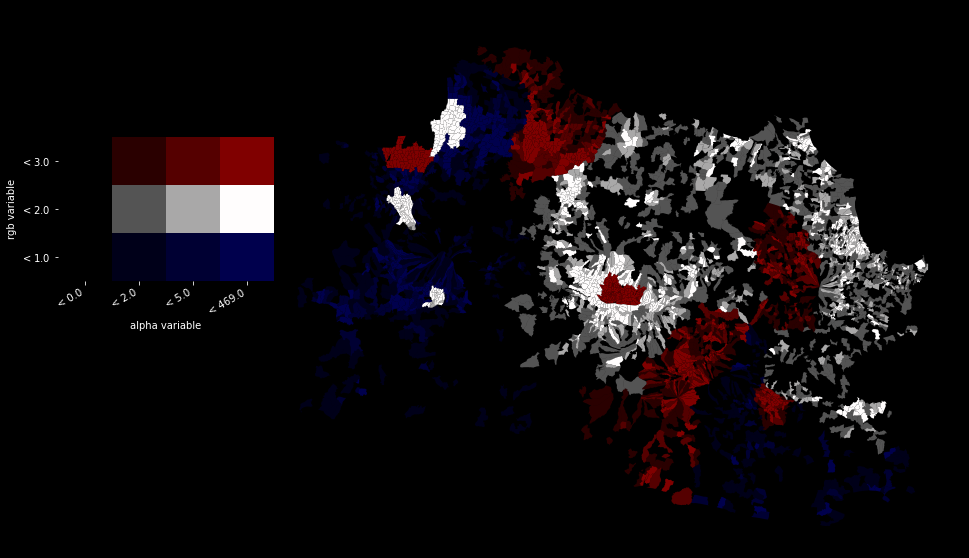

In [75]:
fig, ax = plt.subplots(figsize=(15,10))
#background = "#B1EDE8"
#fig.set_facecolor(background)
vba_choropleth(
     biv_map['status_x'].values, 
     biv_map['confirmation_case'].values, 
     biv_map, 
     rgb_mapclassify=dict(classifier='quantiles'),
     alpha_mapclassify=dict(classifier='quantiles'),
     cmap='seismic', 
     ax=ax,
     revert_alpha=False,
    legend=True)
plt.show()

C:\Users\chris\anaconda3\lib\site-packages\mapclassify\classifiers.py:234: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(
C:\Users\chris\anaconda3\lib\site-packages\mapclassify\classifiers.py:237: UserWarning: Warning: setting k to 2
  Warn("Warning: setting k to %d" % k_q, UserWarning)


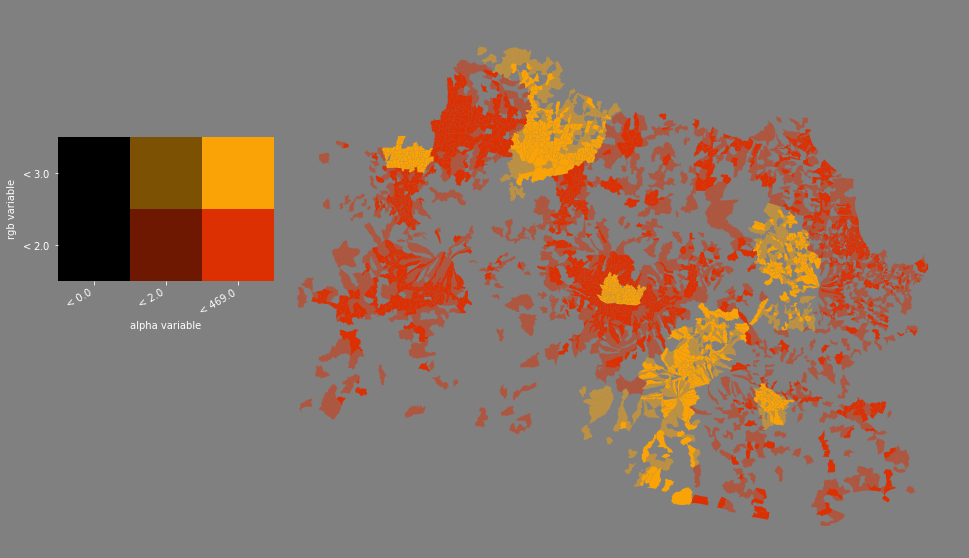

In [82]:
fig, ax = plt.subplots(figsize=(15,10))

background = "grey"
fig.set_facecolor(background)

color_list = ['#dc2f02','#6a040f','#faa307']


vba_choropleth(
     biv_map['status_x'].values, 
     biv_map['confirmation_case'].values, 
     biv_map, 
     rgb_mapclassify=dict(classifier='quantiles',k=3),
     alpha_mapclassify=dict(classifier='quantiles',k=3),
     cmap=color_list, 
     ax=ax,
     revert_alpha=False, legend=True)
plt.show()

In [11]:
rendah = risk_map[risk_map['status']=='Rendah']
sedang = risk_map[risk_map['status']=='Sedang']
tinggi = risk_map[risk_map['status']=='Tinggi']

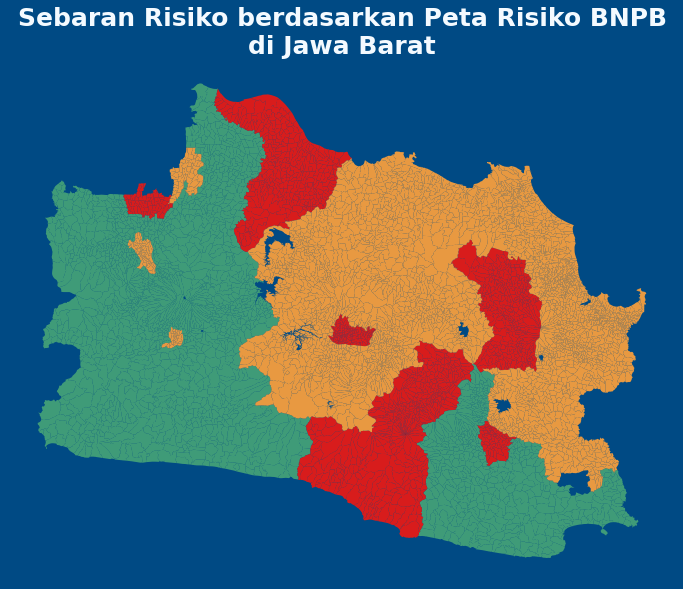

In [21]:
fig, ax = plt.subplots(figsize=(12,12))
ax.set_aspect('equal')
background = "#004a84"
fig.set_facecolor(background)

ax.set_title('Sebaran Risiko berdasarkan Peta Risiko BNPB\ndi Jawa Barat',loc='center',fontsize=25, fontweight ='bold',color='#F4FAFF',fontfamily='Roboto')
ax.axis('off')
#color = [['red','orange','green']]

#inner_join.plot(ax=ax, alpha=0.5, cmap='plasma', linewidth=1, zorder=2,column = 'cluster')
rendah.plot(ax=ax,alpha=5,color='#419D78',label='1')
tinggi.plot(ax=ax,alpha=5,color='#DD1C1A',label='2')
sedang.plot(ax=ax,alpha=5,color='#ED9B40',label='0')
plt.savefig('sebaran.png')
plt.show()